In [1]:
from utils import *

## First Approaches

### Linear Model

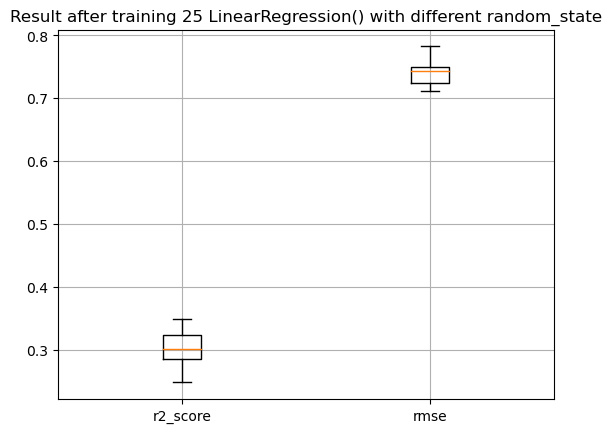

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_type', 'target'],
      dtype='object')


array([ 0.13794193, -0.23993203, -0.00493773,  0.32792249, -0.02292712,
        0.11663431, -0.09966208, -0.3574022 ,  0.07786299,  0.1012844 ,
        0.23997954,  0.18383888])

In [2]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
value = multi_test(linear_model,X,Y,n=25)
print(data_train.columns)
linear_model.coef_

In [ ]:
submit_linear = submission(LinearRegression(),name_file="Submissions/linear_submission.csv")

Grid Search Progress: 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

LinearRegression(fit_intercept=False)


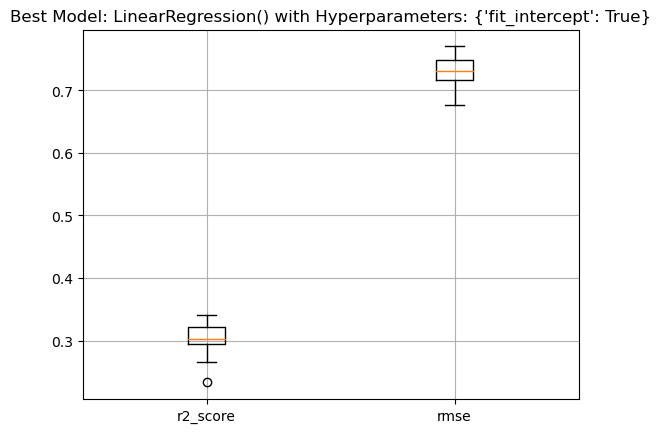

Best hyperparameters: {'fit_intercept': True}
Best score (r2_score): 0.30278683846416127


In [3]:
hyperparameters = {
    "fit_intercept": [True, False]
}

linear_model = LinearRegression()
# Appeler la fonction grid_search avec le modèle linéaire
best_model_linear, best_params_linear, best_score_linear, all_results_linear = grid_search(
    linear_model, X, Y, hyperparameters, n=25, random_start= 42, display_boxplot=True)

In [ ]:
submit_best_linear = submission(best_model_linear,name_file="Submissions/best_linear_submission.csv")

We try an alternative approach by only using some of the features that are the most correlated to the target.

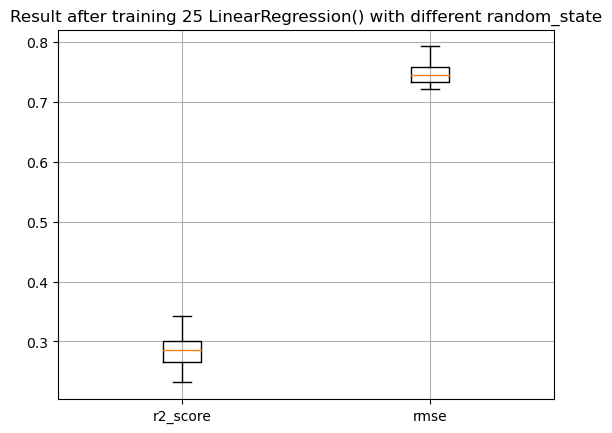

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_type', 'target'],
      dtype='object')


array([ 0.41873365,  0.12315907,  0.06543707, -0.26801485,  0.10572591])

In [4]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
value = multi_test(linear_model,X[["alcohol","residual sugar","sulphates","volatile acidity","wine_type"]],Y,n=25)
print(data_train.columns)
linear_model.coef_

##### Ridge

Grid Search Progress: 100%|██████████| 18/18 [00:07<00:00,  2.28it/s]

Ridge(alpha=1000, fit_intercept=False)


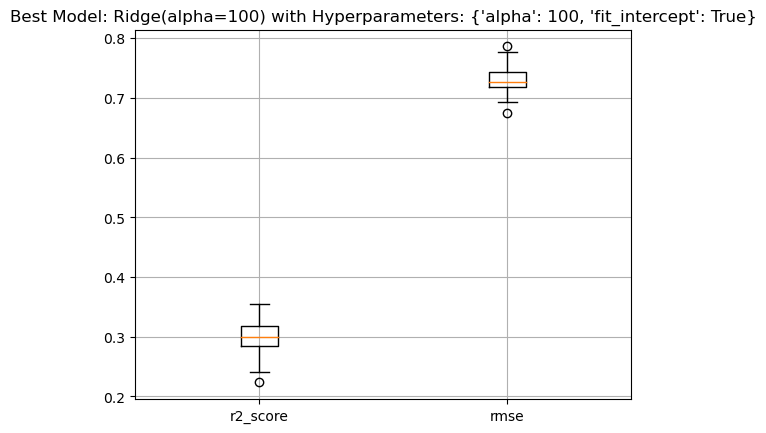

Best hyperparameters: {'alpha': 100, 'fit_intercept': True}
Best score (r2_score): 0.29850431291139456


In [5]:
hyperparameters = {
    "alpha":[0.1,0.3,0.5,1,2,4,10,100,1000],
    "fit_intercept": [True, False]
}

Ridge_model = Ridge()
best_model_ridge, best_params_ridge, best_score_ridge, all_results_ridge = grid_search(
    Ridge_model, X, Y, hyperparameters, n=50, random_start= 42, display_boxplot=True)

In [ ]:
submit_best_ridge = submission(best_model_ridge,name_file="Submissions/best_ridge_submission.csv")

##### Lasso


Grid Search Progress: 100%|██████████| 90/90 [00:31<00:00,  2.85it/s]

Lasso(alpha=1000, fit_intercept=False, tol=0.1)


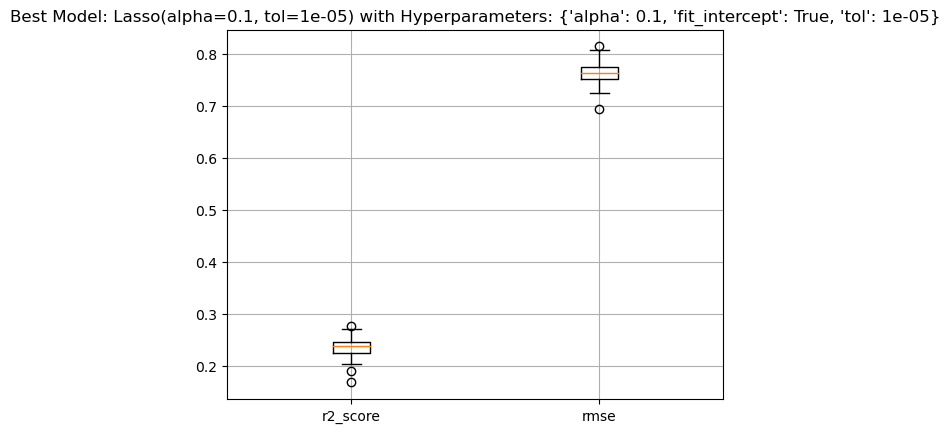

Best hyperparameters: {'alpha': 0.1, 'fit_intercept': True, 'tol': 1e-05}
Best score (r2_score): 0.23614942849534037


In [6]:
hyperparameters = {
    "alpha":[0.1,0.3,0.5,1,2,4,10,100,1000],
    "fit_intercept": [True, False],
    "tol":[0.00001,0.0001,0.001,0.01,0.1],
}

Lasso_model = Lasso()
best_model_lasso, best_params_lasso, best_score_lasso, all_results_lasso = grid_search(
    Lasso_model, X, Y, hyperparameters, n=50, random_start= 42, display_boxplot=True)

In [ ]:
submit_best_lasso = submission(best_model_lasso,name_file="Submissions/best_lasso_submission.csv")

### SVM

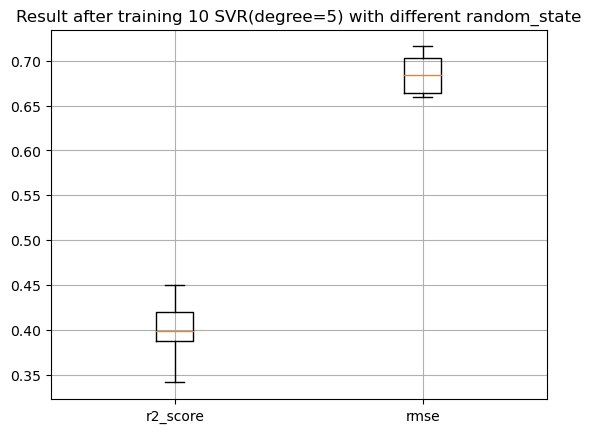

In [13]:
from sklearn import svm
svm_model = svm.SVR()
value = multi_test(svm_model,X,Y,n=25)

In [14]:
from sklearn import svm
svm_model = svm.SVR()
submit_svm = submission(svm_model,name_file="Submissions/svm_submission.csv")

,wine_ID,target
0,5316,5.836451
1,5210,5.136610
2,3518,6.112010
3,1622,4.736397
4,2443,5.228315
...,...,...
1945,6277,6.079256
1946,3035,6.214019
1947,3410,6.005678
1948,6099,5.941801


Grid Search Progress: 100%|██████████| 72/72 [44:16<00:00, 36.89s/it] 


SVR(degree=4, epsilon=0.2, gamma='auto')


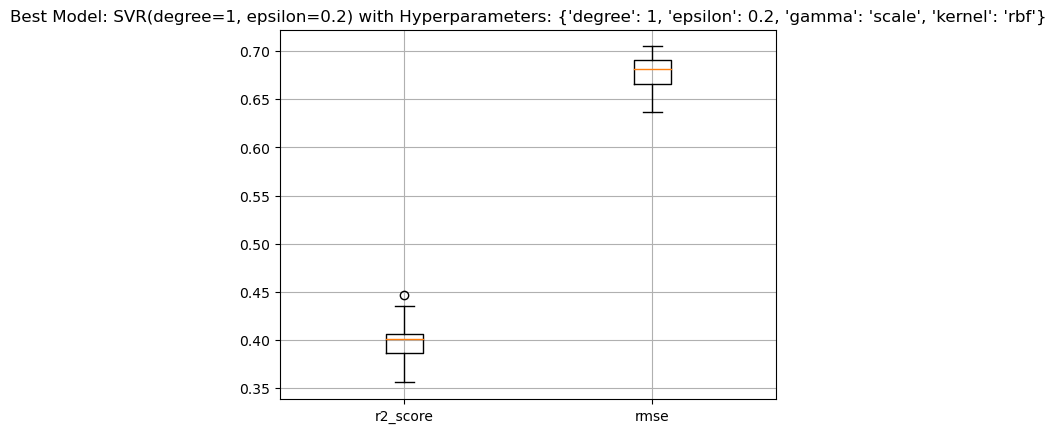

Best hyperparameters: {'degree': 1, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}
Best score (r2_score): 0.3976691999913715


In [15]:
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

hyperparameters = {
    "kernel": [ "linear",'poly','rbf'],
    'degree': [ 1,2,3,4],
    "gamma": ["scale","auto"],
    "epsilon": [0.01,0.1,0.2],
}

SVM_model = svm.SVR()

best_model_svm, best_params_svm, best_score_svm, all_results_svm = grid_search(
    SVM_model, X, Y, hyperparameters, n=25, random_start= 42,
    saving_path="Archives_Model/SVM/grid_best_model.joblib" ,display_boxplot=True)

In [ ]:
submit_best_svm = submission(best_model_svm,name_file="Submissions/best_svm_submission.csv")

### RandomForest

In [17]:
random_seed = 42
param_grid = {
    'n_estimators': [100,250,500],
    'criterion':["friedman_mse",'squared_error','absolute_error'],
    'max_depth': [20,50,100,200],
    'random_state':[random_seed],
    'n_jobs':[nb_cpu//2],
}

forest_model = RandomForestRegressor()

best_model_forest_regressor, best_params_forest_regressor, best_score_forest_regressor, all_results_forest_regressor = grid_search(
    SVM_model, X, Y, hyperparameters, n=25, random_start= 42,
    saving_path="Archives_Model/Random_Forest_Regressor/grid_best_model.joblib" ,display_boxplot=True)

Grid Search Progress:  96%|█████████▌| 69/72 [54:55<02:23, 47.76s/it]  


KeyboardInterrupt: 

In [ ]:
submit_best_forest_regressor = submission(best_model_forest_regressor,name_file="Submissions/best_forest_regressor_submission.csv")

### K Neighbor

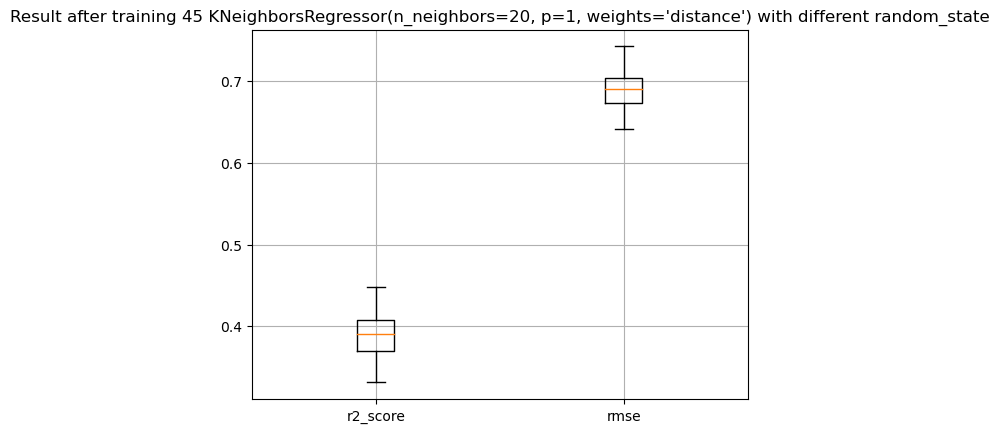

In [ ]:
neighbor_model = KNeighborsRegressor()
value = multi_test(neighbor_model,X,Y,n=50)

In [ ]:
submit_neighbor = submission(neighbor_model,name_file="Submissions/neighbor_submission.csv")

In [18]:
hyperparameters = {
    "weights": [ "uniform",'distance'],
    'p': [ 1,2,3],
    'n_neighbors': [5,15,30,60],
    'leaf_size': [10,20,30,40],
    "n_jobs" : [nb_cpu]
}

neighbor_model = KNeighborsRegressor()

best_model_neighbor_regressor, best_params_neighbor_regressor, best_score_neighbor_regressor, all_results_neighbor_regressor = grid_search(
    neighbor_model, X, Y, hyperparameters, n=25, random_start= 42,
    saving_path="Archives_Model/KNeighbors_Regression/grid_best_model.joblib" ,display_boxplot=True)

NameError: name 'KNeighborsRegressor' is not defined

In [ ]:
submit_best_neighbor_regressor = submission(best_model_neighbor_regressor,name_file = "Submissions/best_neighbor_regressor_submission.csv")

,wine_ID,target
0,5316,5.784787
1,5210,5.301198
2,3518,5.742169
3,1622,5.133944
4,2443,5.112357
...,...,...
1945,6277,6.000000
1946,3035,6.188453
1947,3410,6.170298
1948,6099,6.399121


### Gradient Boosting

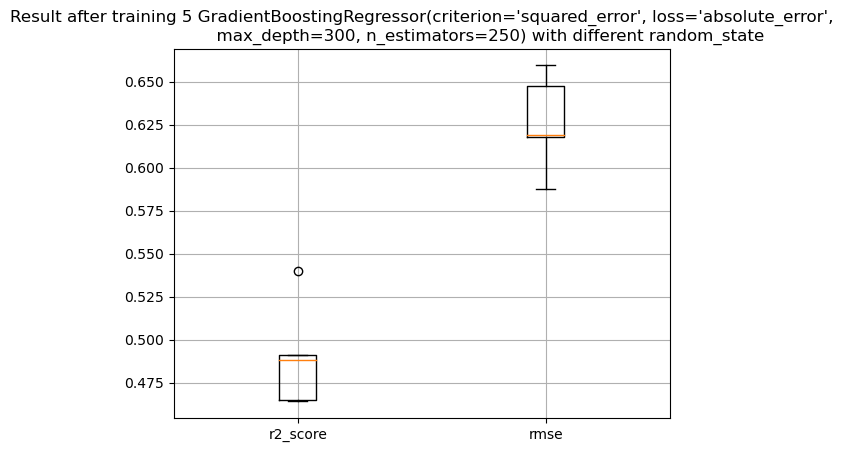

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
boosting_model = GradientBoostingRegressor()
value = multi_test(boosting_model,X,Y,n=5)

In [ ]:
submit_boosting_regressor = submission(GradientBoostingRegressor(),name_file = "Submissions/boosting_regressor_submission.csv")

Grid Search Progress: 100%|██████████| 96/96 [1:42:47<00:00, 64.24s/it]   


GradientBoostingRegressor(criterion='squared_error', learning_rate=0.2,
                          loss='absolute_error', max_depth=400,
                          n_estimators=500, n_iter_no_change=15,
                          random_state=42)


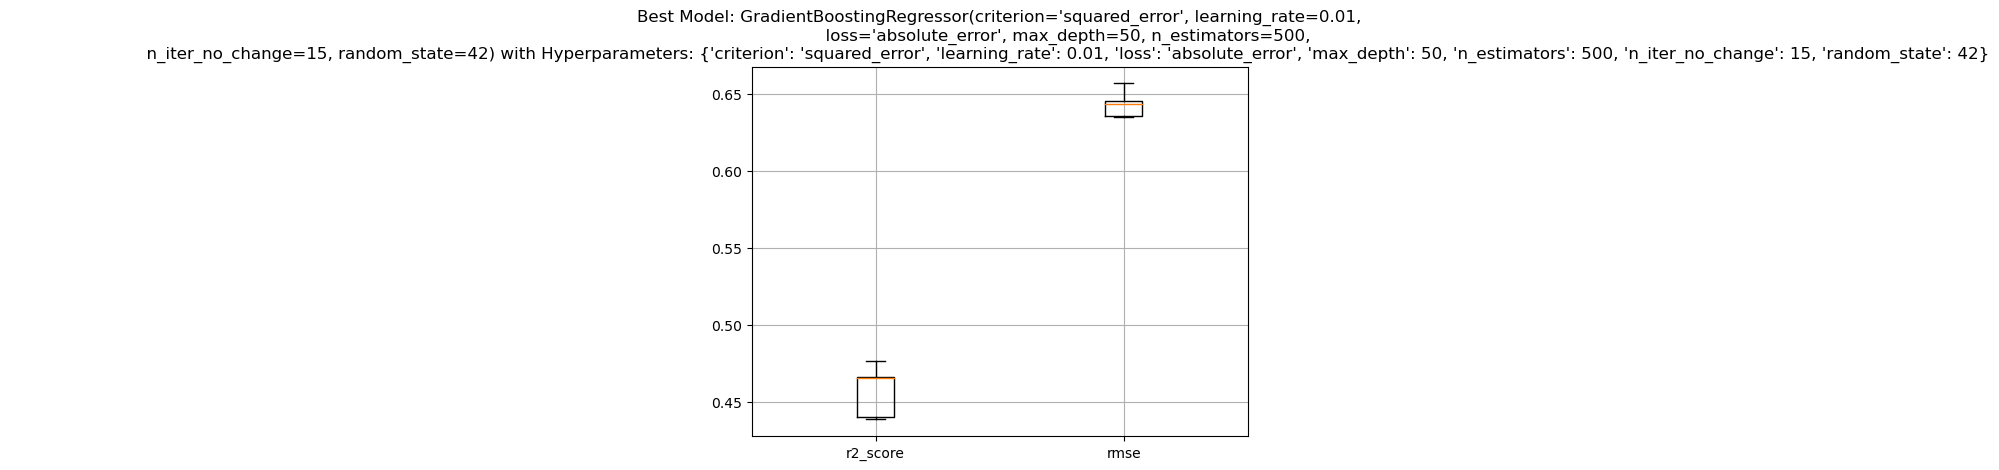

Best hyperparameters: {'criterion': 'squared_error', 'learning_rate': 0.01, 'loss': 'absolute_error', 'max_depth': 50, 'n_estimators': 500, 'n_iter_no_change': 15, 'random_state': 42}
Best score (r2_score): 0.4571724568525789


In [ ]:
random_seed = 42

hyperparameters = {
    "loss": [ "squared_error",'absolute_error'],
    'learning_rate': [ 0.01,0.1,0.2],#, 0.2],
    'n_estimators': [250,500],
    'criterion':["friedman_mse",'squared_error'],
    'max_depth': [50,100,200,400],
    "n_iter_no_change" : [15],
    "random_state": [random_seed],
}

boosting_model = GradientBoostingRegressor()

best_model_boosting, best_params_boosting, best_score_boosting, all_results_boosting = grid_search(
    boosting_model, X, Y, hyperparameters, n=5, random_start= random_seed,
    saving_path="Archives_Model/Boosting_Regression/grid_best_model.joblib" ,display_boxplot=True)

In [ ]:
submit_best_boosting_regressor = submission(best_model_boosting,name_file = "Submissions/best_boosting_regressor_submission.csv")

In [ ]:
"""
random_seed = 42
param_grid = {
    "loss": [ "squared_error",'absolute_error'],
    'learning_rate': [0.001, 0.01, 0.1, 0.25],
    'n_estimators': [100,250,500],
    'criterion':["friedman_mse",'squared_error'],
    'max_depth': [20,50,100,200],
    'alpha': [0.7,0.9,0.95],
    'random_state':[random_seed],
    'n_iter_no_change': [10],
}

boosting_model = GradientBoostingRegressor()

grid_search = GridSearchCV(estimator=boosting_model, param_grid=param_grid, scoring='r2', cv=6,n_jobs=nb_cpu//2)

grid_search.fit(X, Y)
best_params_boost = grid_search.best_params_
best_model_boost = grid_search.best_estimator_
"""

In [ ]:
# save_model(best_model_boost,path_to_save="Archives_Model/Boosting_Regressor/scikit_GDCV_best_model")

In [ ]:
# submit_best_GDCV_boost_regressor = submission(best_model_boost,name_file = "Submissions/best_boost_GDCV_regressor_submission.csv")

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'loss': 'absolute_error',
 'max_depth': 50,
 'n_estimators': 100}

# Classification approach

## Reg Logistique 

### Logistic Regression

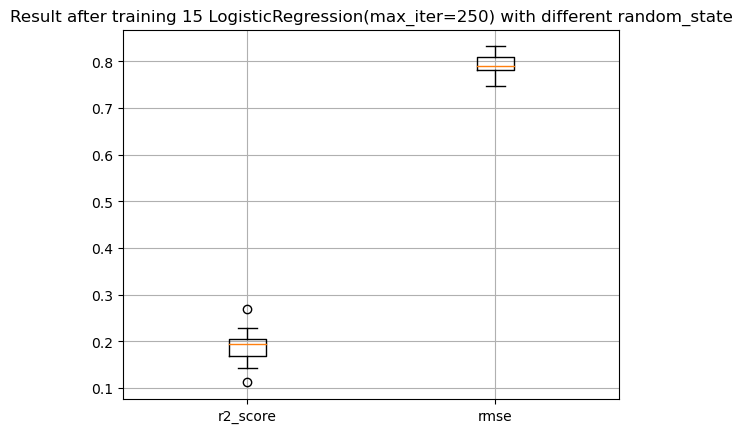

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_type', 'target'],
      dtype='object')


array([[-0.65307091,  0.08943639, -0.0654466 ,  0.97575534, -0.13621977],
       [-0.9279361 , -0.61563276, -0.02520239,  0.94971846, -0.77351074],
       [-1.12571063, -0.20665749, -0.08886932,  0.31960658,  0.13206145],
       [-0.12506752,  0.06110429,  0.11551484, -0.33033481,  0.37246615],
       [ 0.72226633,  0.19388884,  0.32495973, -0.7655172 ,  0.36639458],
       [ 1.11894608,  0.35615979,  0.14047865, -0.78119529,  0.31533022],
       [ 0.99057274,  0.12170093, -0.40143491, -0.36803309, -0.27652189]])

In [7]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
value = multi_test(logistic_model,X,Y,n=50)

In [ ]:
submit_logistic = submission(LogisticRegression(),name_file="Submissions/logistic_submission.csv")

Grid Search Progress: 100%|██████████| 72/72 [05:24<00:00,  4.50s/it]


LogisticRegression(C=10, max_iter=500, tol=1e-05)


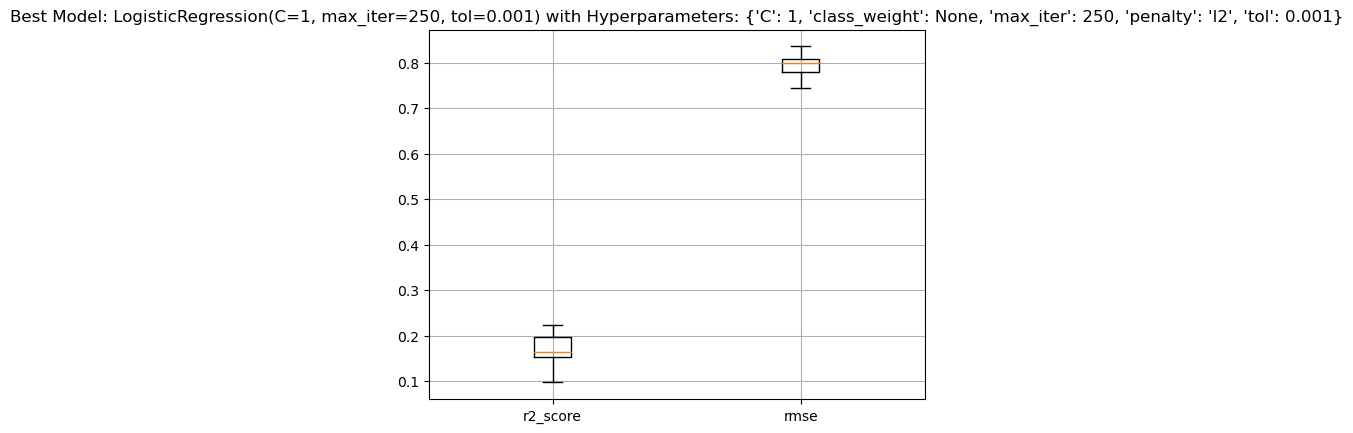

Best hyperparameters: {'C': 1, 'class_weight': None, 'max_iter': 250, 'penalty': 'l2', 'tol': 0.001}
Best score (r2_score): 0.1716818222692994


In [8]:
import warnings
warnings.filterwarnings("ignore")

hyperparameters = {
    "penalty": [ "l2"],
    'C': [0.01, 0.1, 1, 10],
    'class_weight': ['balanced', None],
    'max_iter': [100,250,500],
    'tol': [1e-3,1e-4, 1e-5],
}

logistic_model = LogisticRegression()

best_model_logistic, best_params_logistic, best_score_logistic, all_results_logistic = grid_search(
    logistic_model, X, Y, hyperparameters, n=25, random_start= 42,
    saving_path="Archives_Model/Logistic_Regression/grid_best_model.joblib" ,display_boxplot=True)

In [11]:
submit_best_logistic = submission(best_model_logistic,name_file="Submissions/best_logistic_submission.csv")

## Kforest

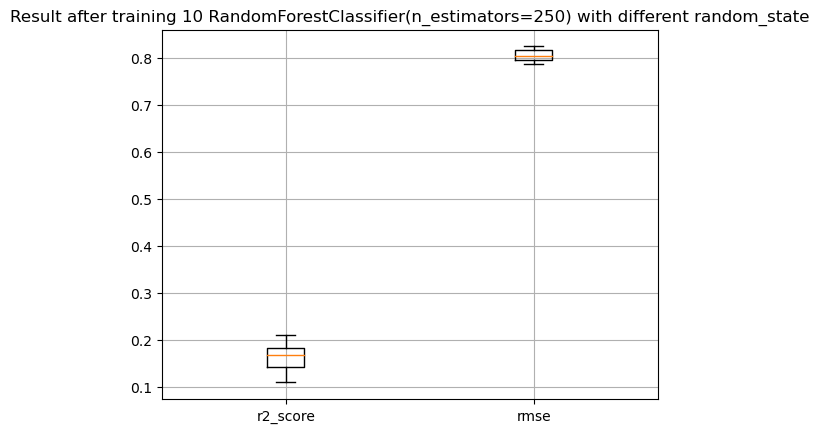

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_model_classif = RandomForestClassifier()
value = multi_test(forest_model_classif,X,Y,n=25)

### Kneighbors

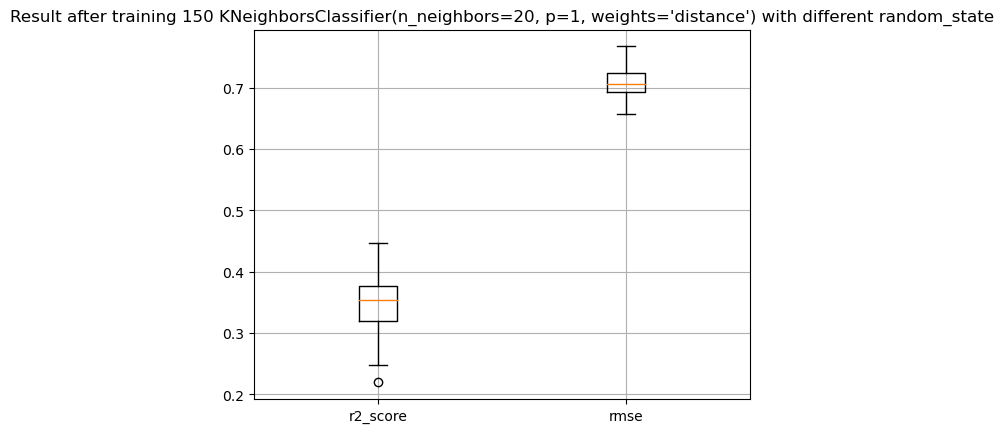

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors_model_classif = KNeighborsClassifier(n_neighbors=20,weights="distance",p=1)
value = multi_test(neighbors_model_classif,X,Y,n=150)

In [ ]:
submit_neighbor_classifier = submission(neighbors_model_classif,name_file = "Submissions/neighbor_classif_submissions.csv")

,wine_ID,target
0,5316,6
1,5210,5
2,3518,5
3,1622,5
4,2443,5
...,...,...
1945,6277,6
1946,3035,6
1947,3410,6
1948,6099,6


In [ ]:
hyperparameters = {
    "weights": [ "uniform",'distance'],
    'p': [ 1,2,3],
    'n_neighbors': [5,10,20,30,60],
    'leaf_size': [10,20,30,40],
    "n_jobs" : [nb_cpu]
}

neighbor_model = KNeighborsClassifier()

best_model_neighbor_classifier, best_params_neighbor_classifier, best_score_neighbor_classifier, all_results_neighbor_classifier = grid_search(
    neighbor_model, X, Y, hyperparameters, n=25, random_start= 42,
    saving_path="Archives_Model/KNeighbors_Regression/grid_best_model.joblib" ,display_boxplot=True)

In [ ]:
submit_best_neighbor_classifier = submission(best_model_neighbor_classifier,name_file = "Submissions/best_neighbor_classif_submissions.csv")

## Boosting Classif

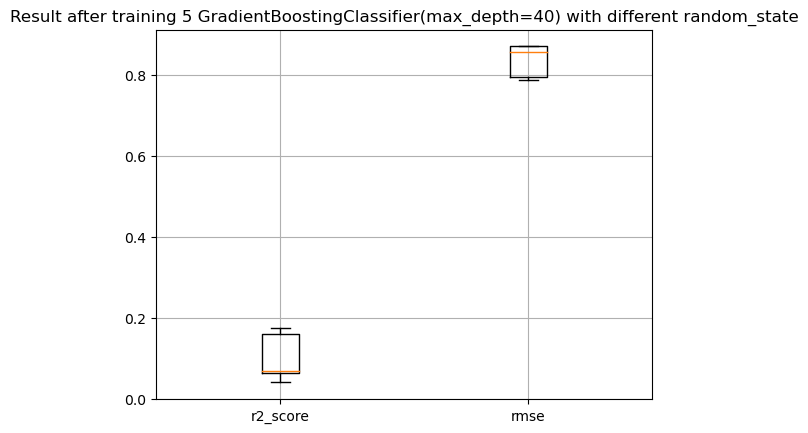

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
boosting_model = GradientBoostingClassifier()
value = multi_test(boosting_model,X,Y,n=5)

### MLP